In [1]:
'''
%load_ext pycodestyle_magic
%pycodestyle_on
'''

In [1]:
%pylab inline

import pandas as pd

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import QuantileTransformer
from sklearn.manifold import TSNE

from yellowbrick.cluster import KElbowVisualizer, InterclusterDistance, SilhouetteVisualizer
import plotly.express as px

import gpelletier.custom.projet4.functions as gp4f

Populating the interactive namespace from numpy and matplotlib


In [ ]:
#-------------------#
#-------------------#

In [3]:
# Data for the clustering = 1 month

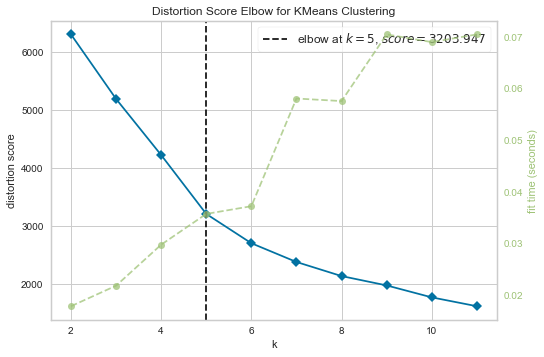

In [2]:
data = gp4f.data_no_quali_features('customer_unique_id')
data_subset_RFM = gp4f.rfm_review_data(
    data, 'customer_unique_id', 'customer_id', 'order_id',
    'product_id', 'payment_value', 'review_score',
    'order_purchase_timestamp', '2017-01-01', 1
    )
x_scaled = gp4f.RFM_review_to_x_scaled(data_subset_RFM)

# Instantiate the clustering model and visualizer
model = KMeans(random_state=0)
visualizer = KElbowVisualizer(model, k=(2, 12))

# Fit the data to the visualizer
visualizer.fit(x_scaled)
# Finalize and render the figure
visualizer.show()

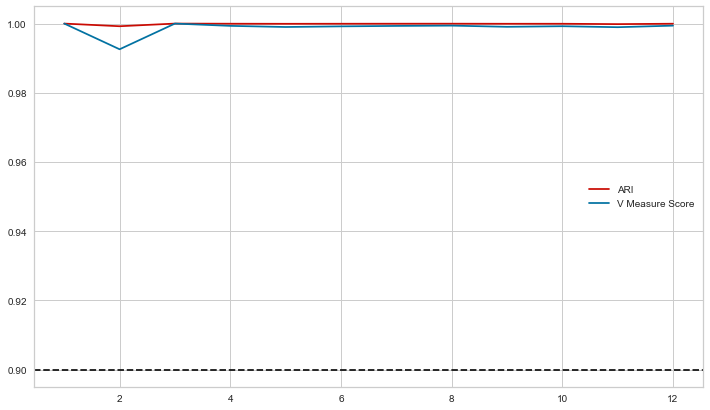

In [3]:
gp4f.clustering_models_score(
    'customer_unique_id', 'customer_id', 'order_id',
    'product_id', 'payment_value', 'review_score',
    'order_purchase_timestamp', date='2017-01-01',
    delta_month=1, number_of_months=1, nbr_cycles=12,
    nbr_clusters=5, random_state_number=0, threshold=0.90
    )

In [7]:
data = gp4f.data_no_quali_features('customer_unique_id')
data_subset_RFM = gp4f.rfm_review_data(
    data, 'customer_unique_id', 'customer_id', 'order_id',
    'product_id', 'payment_value', 'review_score',
    'order_purchase_timestamp', '2017-01-01', 1)
x_scaled = gp4f.RFM_review_to_x_scaled(data_subset_RFM)

clustering_model = KMeans(n_clusters=5, random_state=0)
clustering_model.fit(x_scaled)

scaler = QuantileTransformer(random_state=0)
x_tranform_bis = scaler.fit_transform(x_scaled)

result = pd.DataFrame(x_tranform_bis)
result.columns = [
    'Monetary_Value', 'Frequency', 'Recency', 'Delivery', 'Review'
    ]
result.insert(loc=0, column='group', value=clustering_model.labels_)

df_show_clusters = result.copy()
df_show_clusters = df_show_clusters.groupby(
    by='group', as_index=False
    ).agg('mean')

df_show_clusters

,group,Monetary_Value,Frequency,Recency,Delivery,Review
0,0,0.497603,0.000000,0.000000,0.552465,0.725182
1,1,0.502806,0.000000,0.535227,0.464171,1.000000
2,2,0.499450,0.000000,0.531342,0.531963,0.245777
3,3,0.380616,0.984239,0.606890,0.420489,0.818684
4,4,0.524472,0.028829,0.543192,0.589379,0.000000


In [ ]:
'''
The dataset is only split with frequency and review features.
The average of the others are too similar.
'''

In [ ]:
#-------------------#
#-------------------#

In [10]:
# Data for the clustering = 2 months

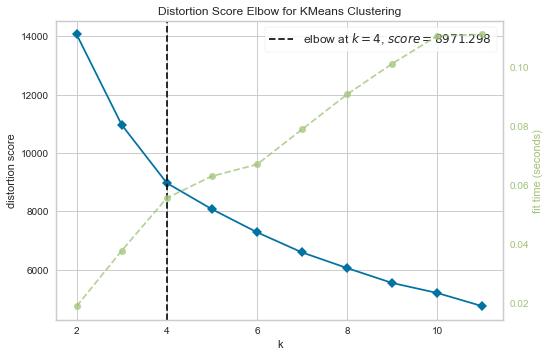

In [12]:
data = gp4f.data_no_quali_features('customer_unique_id')
data_subset_RFM = gp4f.rfm_review_data(
    data, 'customer_unique_id', 'customer_id', 'order_id',
    'product_id', 'payment_value', 'review_score',
    'order_purchase_timestamp', '2017-01-01', 2
    )
x_scaled = gp4f.RFM_review_to_x_scaled(data_subset_RFM)

# Instantiate the clustering model and visualizer
model = KMeans(random_state=0)
visualizer = KElbowVisualizer(model, k=(2, 12))

# Fit the data to the visualizer
visualizer.fit(x_scaled)
# Finalize and render the figure
visualizer.show()

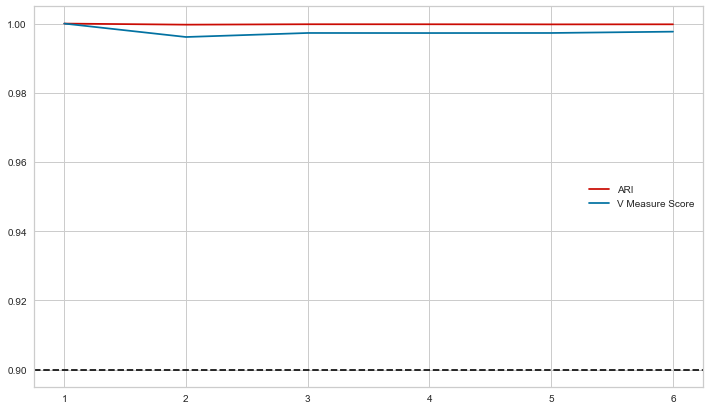

In [13]:
gp4f.clustering_models_score(
    'customer_unique_id', 'customer_id', 'order_id',
    'product_id', 'payment_value', 'review_score',
    'order_purchase_timestamp', date='2017-01-01',
    delta_month=2, number_of_months=2, nbr_cycles=6,
    nbr_clusters=4, random_state_number=0, threshold=0.90
    )

In [14]:
data = gp4f.data_no_quali_features('customer_unique_id')
data_subset_RFM = gp4f.rfm_review_data(
    data, 'customer_unique_id', 'customer_id', 'order_id',
    'product_id', 'payment_value', 'review_score',
    'order_purchase_timestamp', '2017-01-01', 2
    )
x_scaled = gp4f.RFM_review_to_x_scaled(data_subset_RFM)

clustering_model = KMeans(n_clusters=4, random_state=0)
clustering_model.fit(x_scaled)

scaler = QuantileTransformer(random_state=0)
x_tranform_bis = scaler.fit_transform(x_scaled)

result = pd.DataFrame(x_tranform_bis)
result.columns = [
    'Monetary_Value', 'Frequency', 'Recency', 'Delivery', 'Review'
    ]
result.insert(loc=0, column='group', value=clustering_model.labels_)

df_show_clusters = result.copy()
df_show_clusters = df_show_clusters.groupby(
    by='group', as_index=False
    ).agg('mean')

df_show_clusters

,group,Monetary_Value,Frequency,Recency,Delivery,Review
0,0,0.513561,0.000000,0.503364,0.568226,0.000000
1,1,0.501391,0.000000,0.502114,0.469659,1.000000
2,2,0.497012,0.000000,0.477953,0.512701,0.231233
3,3,0.447644,0.990663,0.587667,0.421393,0.640079


In [ ]:
'''
The dataset is only split with frequency and review features.
The average of the others are too similar.
'''

In [ ]:
#-------------------#
#-------------------#

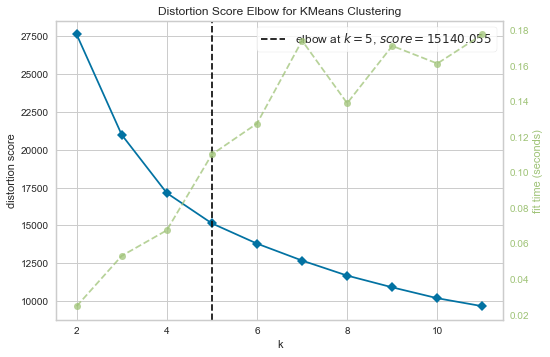

In [16]:
data = gp4f.data_no_quali_features('customer_unique_id')
data_subset_RFM = gp4f.rfm_review_data(
    data, 'customer_unique_id', 'customer_id', 'order_id',
    'product_id', 'payment_value', 'review_score',
    'order_purchase_timestamp', '2017-01-01', 3
    )
x_scaled = gp4f.RFM_review_to_x_scaled(data_subset_RFM)

# Instantiate the clustering model and visualizer
model = KMeans(random_state=0)
visualizer = KElbowVisualizer(model, k=(2, 12))

# Fit the data to the visualizer
visualizer.fit(x_scaled)
# Finalize and render the figure
visualizer.show()

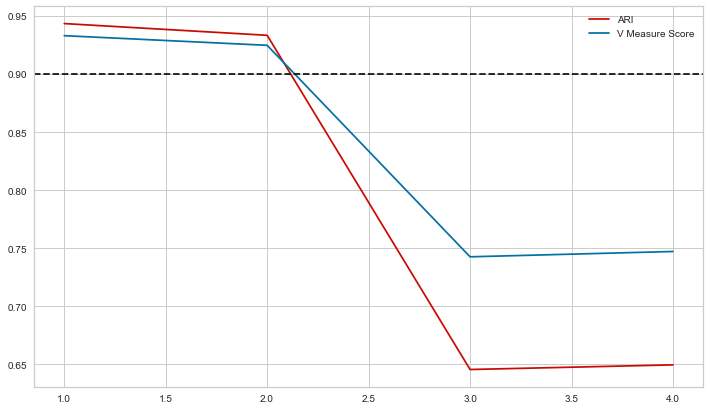

In [17]:
gp4f.clustering_models_score(
    'customer_unique_id', 'customer_id', 'order_id',
    'product_id', 'payment_value', 'review_score',
    'order_purchase_timestamp', date='2017-01-01',
    delta_month=3, number_of_months=3, nbr_cycles=4,
    nbr_clusters=5, random_state_number=0, threshold=0.90
    )

In [18]:
data = gp4f.data_no_quali_features('customer_unique_id')
data_subset_RFM = gp4f.rfm_review_data(
    data, 'customer_unique_id', 'customer_id', 'order_id',
    'product_id', 'payment_value', 'review_score',
    'order_purchase_timestamp', '2017-01-01', 3
    )
x_scaled = gp4f.RFM_review_to_x_scaled(data_subset_RFM)

clustering_model = KMeans(n_clusters=5, random_state=0)
clustering_model.fit(x_scaled)

scaler = QuantileTransformer(random_state=0)
x_tranform_bis = scaler.fit_transform(x_scaled)

result = pd.DataFrame(x_tranform_bis)
result.columns = [
    'Monetary_Value', 'Frequency', 'Recency', 'Delivery', 'Review'
    ]
result.insert(loc=0, column='group', value=clustering_model.labels_)

df_show_clusters = result.copy()
df_show_clusters = df_show_clusters.groupby(
    by='group', as_index=False
    ).agg('mean')

df_show_clusters

,group,Monetary_Value,Frequency,Recency,Delivery,Review
0,0,0.578581,0.000000,0.710791,0.534507,1.000000
1,1,0.498874,0.000000,0.493724,0.514953,0.192047
2,2,0.411967,0.000000,0.272093,0.381391,1.000000
3,3,0.518713,0.000000,0.489073,0.599369,0.000000
4,4,0.457174,0.991394,0.555596,0.461900,0.542325


In [ ]:
'''
The 5 groups seem relatively different according to all the features.
'''

In [ ]:
#-------------------#
#-------------------#

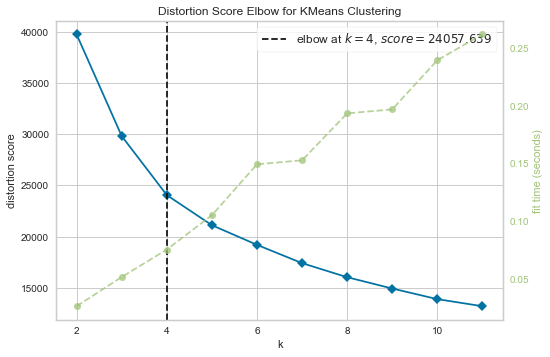

In [20]:
data = gp4f.data_no_quali_features('customer_unique_id')
data_subset_RFM = gp4f.rfm_review_data(
    data, 'customer_unique_id', 'customer_id', 'order_id',
    'product_id', 'payment_value', 'review_score',
    'order_purchase_timestamp', '2017-01-01', 4
    )
x_scaled = gp4f.RFM_review_to_x_scaled(data_subset_RFM)

# Instantiate the clustering model and visualizer
model = KMeans(random_state=0)
visualizer = KElbowVisualizer(model, k=(2, 12))

# Fit the data to the visualizer
visualizer.fit(x_scaled)
# Finalize and render the figure
visualizer.show()

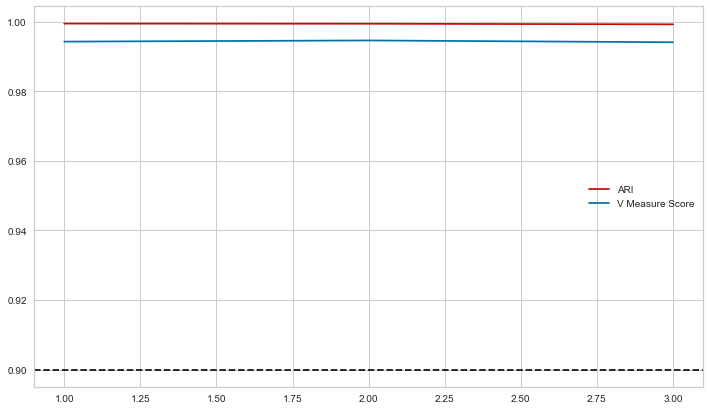

In [21]:
gp4f.clustering_models_score(
    'customer_unique_id', 'customer_id', 'order_id',
    'product_id', 'payment_value', 'review_score',
    'order_purchase_timestamp', date='2017-01-01',
    delta_month=4, number_of_months=4, nbr_cycles=3,
    nbr_clusters=4, random_state_number=0, threshold=0.90
    )

In [22]:
data = gp4f.data_no_quali_features('customer_unique_id')
data_subset_RFM = gp4f.rfm_review_data(
    data, 'customer_unique_id', 'customer_id', 'order_id',
    'product_id', 'payment_value', 'review_score',
    'order_purchase_timestamp', '2017-01-01', 4
    )
x_scaled = gp4f.RFM_review_to_x_scaled(data_subset_RFM)

clustering_model = KMeans(n_clusters=4, random_state=0)
clustering_model.fit(x_scaled)

scaler = QuantileTransformer(random_state=0)
x_tranform_bis = scaler.fit_transform(x_scaled)

result = pd.DataFrame(x_tranform_bis)
result.columns = [
    'Monetary_Value', 'Frequency', 'Recency', 'Delivery', 'Review'
    ]
result.insert(loc=0, column='group', value=clustering_model.labels_)

df_show_clusters = result.copy()
df_show_clusters = df_show_clusters.groupby(
    by='group', as_index=False
    ).agg('mean')

df_show_clusters

,group,Monetary_Value,Frequency,Recency,Delivery,Review
0,0,0.499659,0.000000,0.505882,0.459455,1.000000
1,1,0.495862,0.000000,0.490119,0.521923,0.252373
2,2,0.528131,0.000000,0.485867,0.614667,0.000000
3,3,0.449736,0.991304,0.531338,0.446655,0.611774


In [ ]:
'''
For all the groups, the monetary and recency
features do not seem very different.
'''

In [ ]:
#-------------------#
#-------------------#

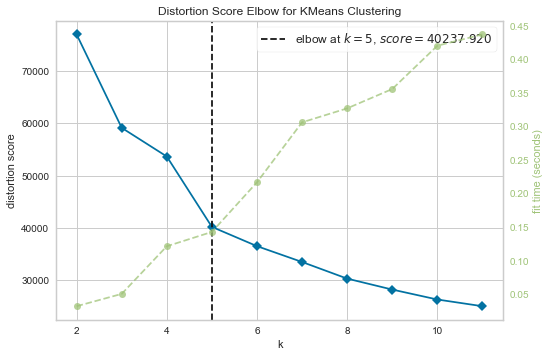

In [24]:
data = gp4f.data_no_quali_features('customer_unique_id')
data_subset_RFM = gp4f.rfm_review_data(
    data, 'customer_unique_id', 'customer_id', 'order_id',
    'product_id', 'payment_value', 'review_score',
    'order_purchase_timestamp', '2017-01-01', 6
    )
x_scaled = gp4f.RFM_review_to_x_scaled(data_subset_RFM)

# Instantiate the clustering model and visualizer
model = KMeans(random_state=0)
visualizer = KElbowVisualizer(model, k=(2, 12))

# Fit the data to the visualizer
visualizer.fit(x_scaled)
# Finalize and render the figure
visualizer.show()

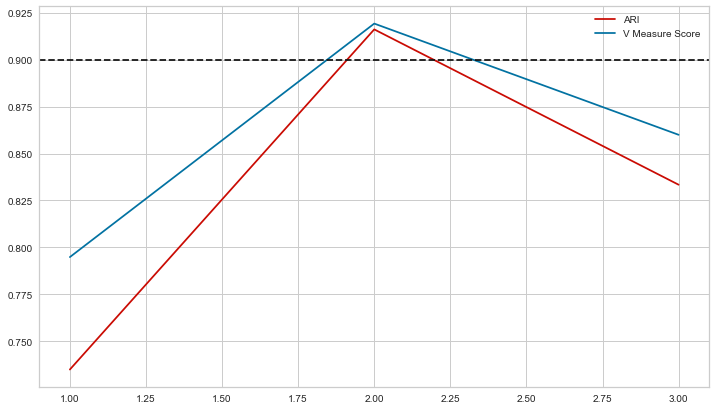

In [25]:
gp4f.clustering_models_score(
    'customer_unique_id', 'customer_id', 'order_id',
    'product_id', 'payment_value', 'review_score',
    'order_purchase_timestamp', date='2017-01-01',
    delta_month=6, number_of_months=6, nbr_cycles=3,
    nbr_clusters=5, random_state_number=0, threshold=0.90
    )

In [ ]:
'''
For the first prediction, the rand score is under 0.75.
We will not use 6 months in order to train our algorithm.
'''

In [ ]:
#-------------------#
#-------------------#

In [ ]:
'''
Conclusion:

We will use a trimester (3 months) to train our clustering algorithm.
'''